In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

%config InlineBackend.figure_format = 'retina' 

# Load pre-processed data

In [3]:
import geopandas as gpd

In [4]:
df = pd.read_csv("airbnb_version1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101221 entries, 0 to 101220
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              101221 non-null  int64  
 1   NAME                            100980 non-null  object 
 2   host id                         101221 non-null  int64  
 3   host_identity_verified          100949 non-null  object 
 4   neighbourhood group             101194 non-null  object 
 5   neighbourhood                   101207 non-null  object 
 6   lat                             101213 non-null  float64
 7   long                            101213 non-null  float64
 8   instant_bookable                101125 non-null  float64
 9   cancellation_policy             101146 non-null  object 
 10  room type                       101221 non-null  object 
 11  Construction year               101020 non-null  float64
 12  price           

In [5]:
#Rename a column to accurately reflect Boroughs
df.rename(columns={'neighbourhood group':'boroname'}, inplace=True)
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified   boroname neighbourhood       lat      long  \
0            unconfirmed   Brooklyn    Kensington  40.64749 -73.97237   
1               verified  Manhattan       Midtown  40.75362 -73.98377   
2                    NaN  Manhattan        Harlem  40.80902 -73.94190   
3            unconfirmed   Brooklyn  Clinton Hill  40.68514 -73.95976   
4               verified  Manhattan   East Harlem  40.79851 -73.94399   

   instant_bookable cancellation_policy  ... service fee  minimum nights  \
0               0.0              strict  ...       966.0            10.0   
1               0.0            moderate  ...       142.0            30.0   
2               1.0            flexible  ...       620.0             3.0   
3               1.0            moderate  ...       368.0            30.0   
4               0.0            moderate  ...       204.0            10.0   

   number of reviews  last review  reviews per month  review rate number  \
0                9.0   2021-10-19               0.21                 4.0   
1               45.0   2022-05-21               0.38                 4.0   
2                0.0          NaN                NaN                 5.0   
3              270.0   2019-07-05               4.64                 4.0   
4                9.0   2018-11-19               0.10                 3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules  Building_Age  
0  Clean up and treat the home the way you'd like...           3.0  
1  Pet friendly but please confirm with me if the...          16.0  
2  I encourage you to use my kitchen, cooking and...          18.0  
3                                                NaN          18.0  
4  Please no smoking in the house, porch or on th...          14.0  

[5 rows x 23 columns]

# Radar Chart

### Prepare the Data

In [6]:
radar = pd.DataFrame(df['boroname'].value_counts()).reset_index()
radar.columns = ['theta','r']
radar['test'] = radar['theta'] + " " + "("+radar['r'].astype('str')+")"
radar

theta      r                 test
0      Manhattan  43111    Manhattan (43111)
1       Brooklyn  41341     Brooklyn (41341)
2         Queens  13125       Queens (13125)
3          Bronx   2677         Bronx (2677)
4  Staten Island    940  Staten Island (940)

In [7]:
import plotly.express as px
import pandas as pd
fig = px.line_polar(radar, r='r', theta='test', line_close=True, 
                    color_discrete_sequence=px.colors.sequential.Pinkyl_r, 
                    title="Unveiling Listing Counts Across Neighbourhood Groups",
                   template="plotly",markers=True,direction='counterclockwise',width=750, height=650)
fig.update_traces(fill='toself',line_color='#ff5a5f', line_width=1)
fig.show()

# GeoPandas Lat Long Chart

<Axes: xlabel='long', ylabel='lat'>

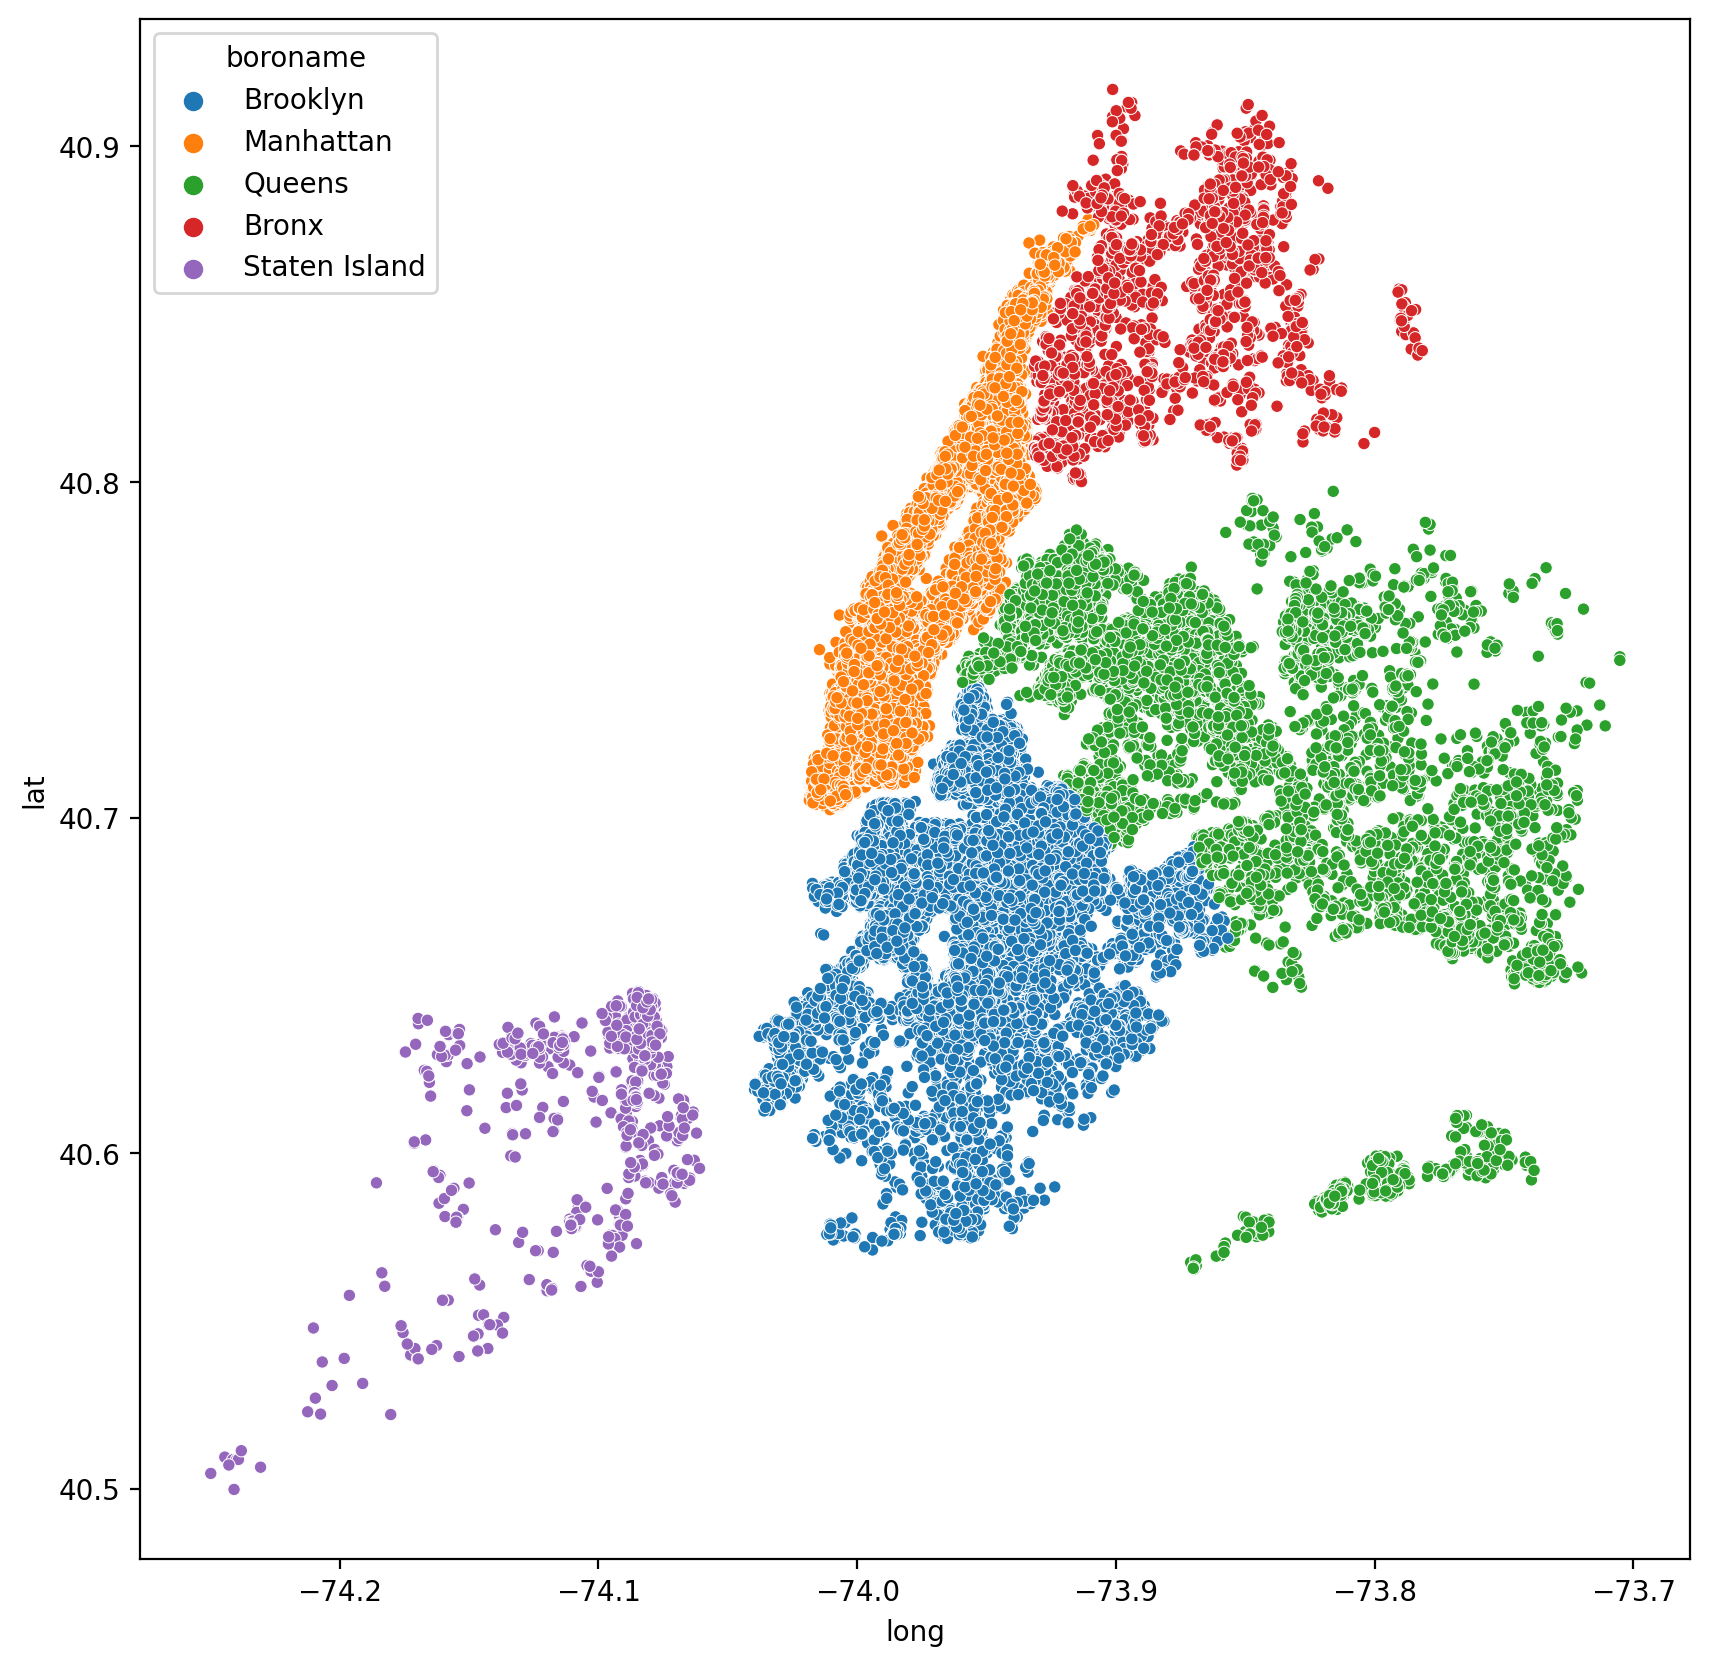

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', hue='boroname',s=20, data=df)

# GeoPandas - Each Borough

In [9]:
from shapely.geometry import Point, Polygon

In [10]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

/var/folders/2z/gd1p94dj1cqgnb_qpvfykfg40000gn/T/ipykernel_4268/4041603262.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')




In [11]:
#Get a count by borough
borough_count = df.groupby('boroname').agg('count').reset_index()

In [12]:
#Rename the column to boroname, so that we can join the data to it on a common field
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')
bc_geo

BoroCode       boroname     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry     id   NAME  host id  \
0  MULTIPOLYGON (((970217.022 145643.332, 970227....    940    939      940   
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  13125  13097    13125   
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  41341  41235    41341   
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  43111  43015    43111   
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...   2677   2669     2677   

   host_identity_verified  neighbourhood  ...  service fee  minimum nights  \
0                     936            940  ...          940             940   
1                   13098          13125  ...        13125           13125   
2                   41225          41334  ...        41341           41341   
3                   43000          43104  ...        43111           43111   
4                    2669           2677  ...         2677            2677   

   number of reviews  last review  reviews per month  review rate number  \
0                940          839                839                 940   
1              13125        11388              11389               13125   
2              41341        35557              35558               41341   
3              43111        35475              35480               43111   
4               2677         2332               2332                2677   

   calculated host listings count  availability 365  house_rules  Building_Age  
0                             940               939          424           939  
1                           13125             13060         5937         13108  
2                           41341             41169        20532         41250  
3                           43111             42953        21773         43026  
4                            2677              2661         1121          2674  

[5 rows x 27 columns]

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

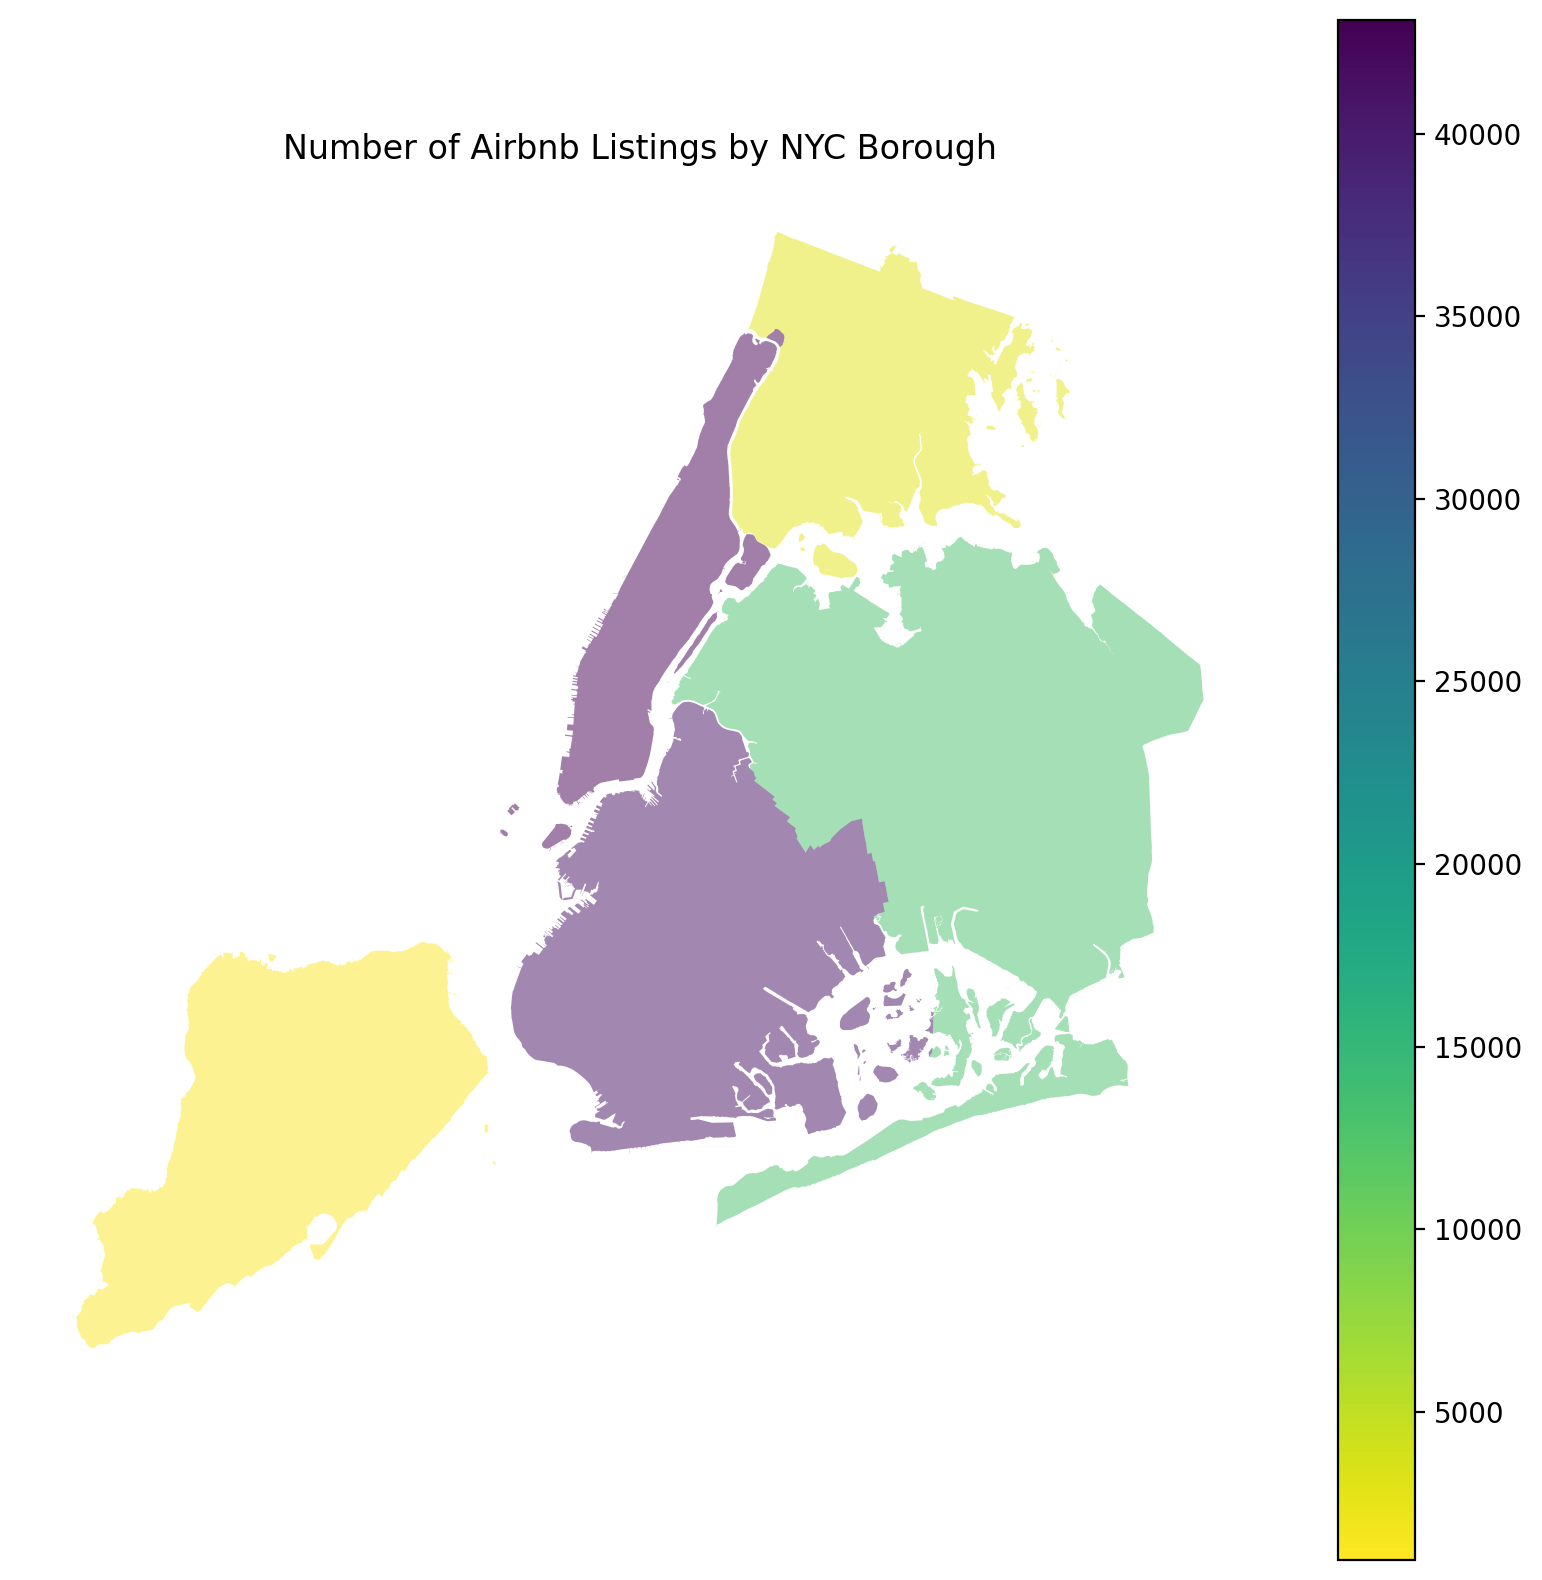

In [13]:
#Plot the count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
# ax.scatter(df.long, df.lat)
bc_geo.plot(column='id', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
# gdf_of_points.plot(ax=ax)
# bc_geo.apply(lambda x: ax.annotate(s=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center', text="test"), axis=1)
plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('off')

In [14]:
nyc = nyc.set_index('boroname')

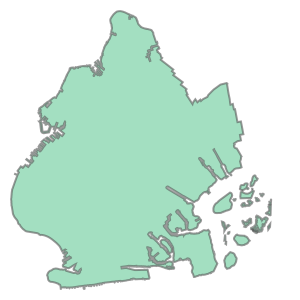

In [15]:
brooklyn = nyc.loc["Brooklyn", "geometry"]
brooklyn

/Users/bhumikasrinivas/opt/anaconda3/envs/geo-env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



<Axes: >

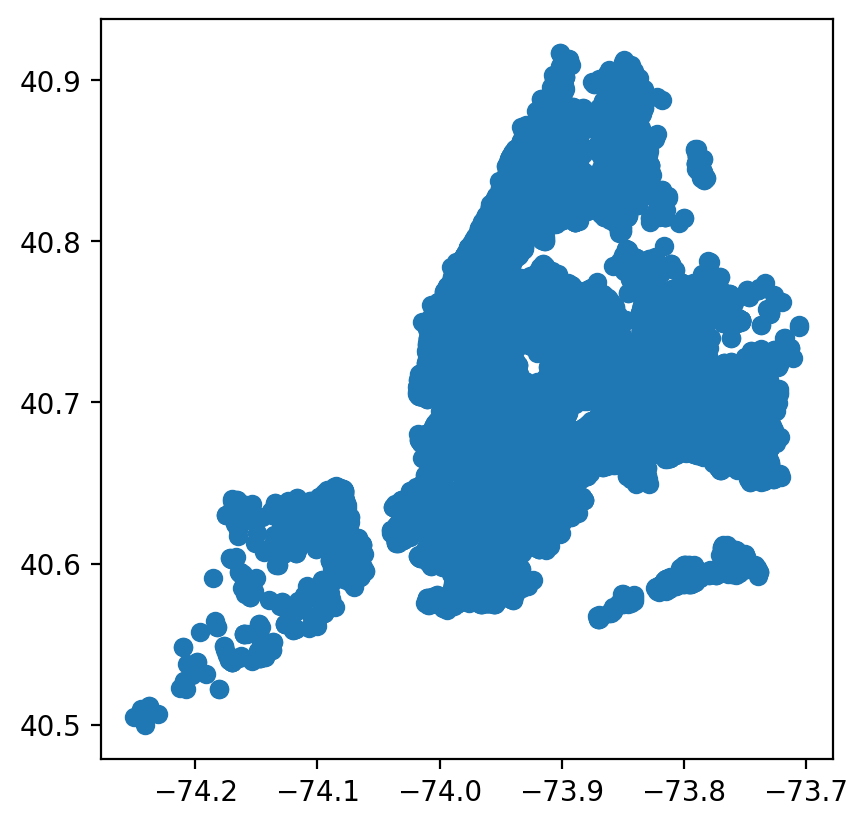

In [16]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df["long"], df["lat"])]
geodata=gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
geodata.plot()

In [17]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)

/var/folders/2z/gd1p94dj1cqgnb_qpvfykfg40000gn/T/ipykernel_4268/4085191795.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')




In [18]:
nyc

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [19]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# cmap = ListedColormap(["#FFDDDD", "#FFD9D9", "#FF9393", "#FF8888", "#FF7272", "#FF5555", "#FF4141", "#EE2C2C"])


import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np

cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#FFDEDF', '#FE0000'], N=256)


In [20]:
brooklyn = nyc.iloc[[2], :]
brooklyn_geo = geodata[geodata['boroname'] == 'Brooklyn']

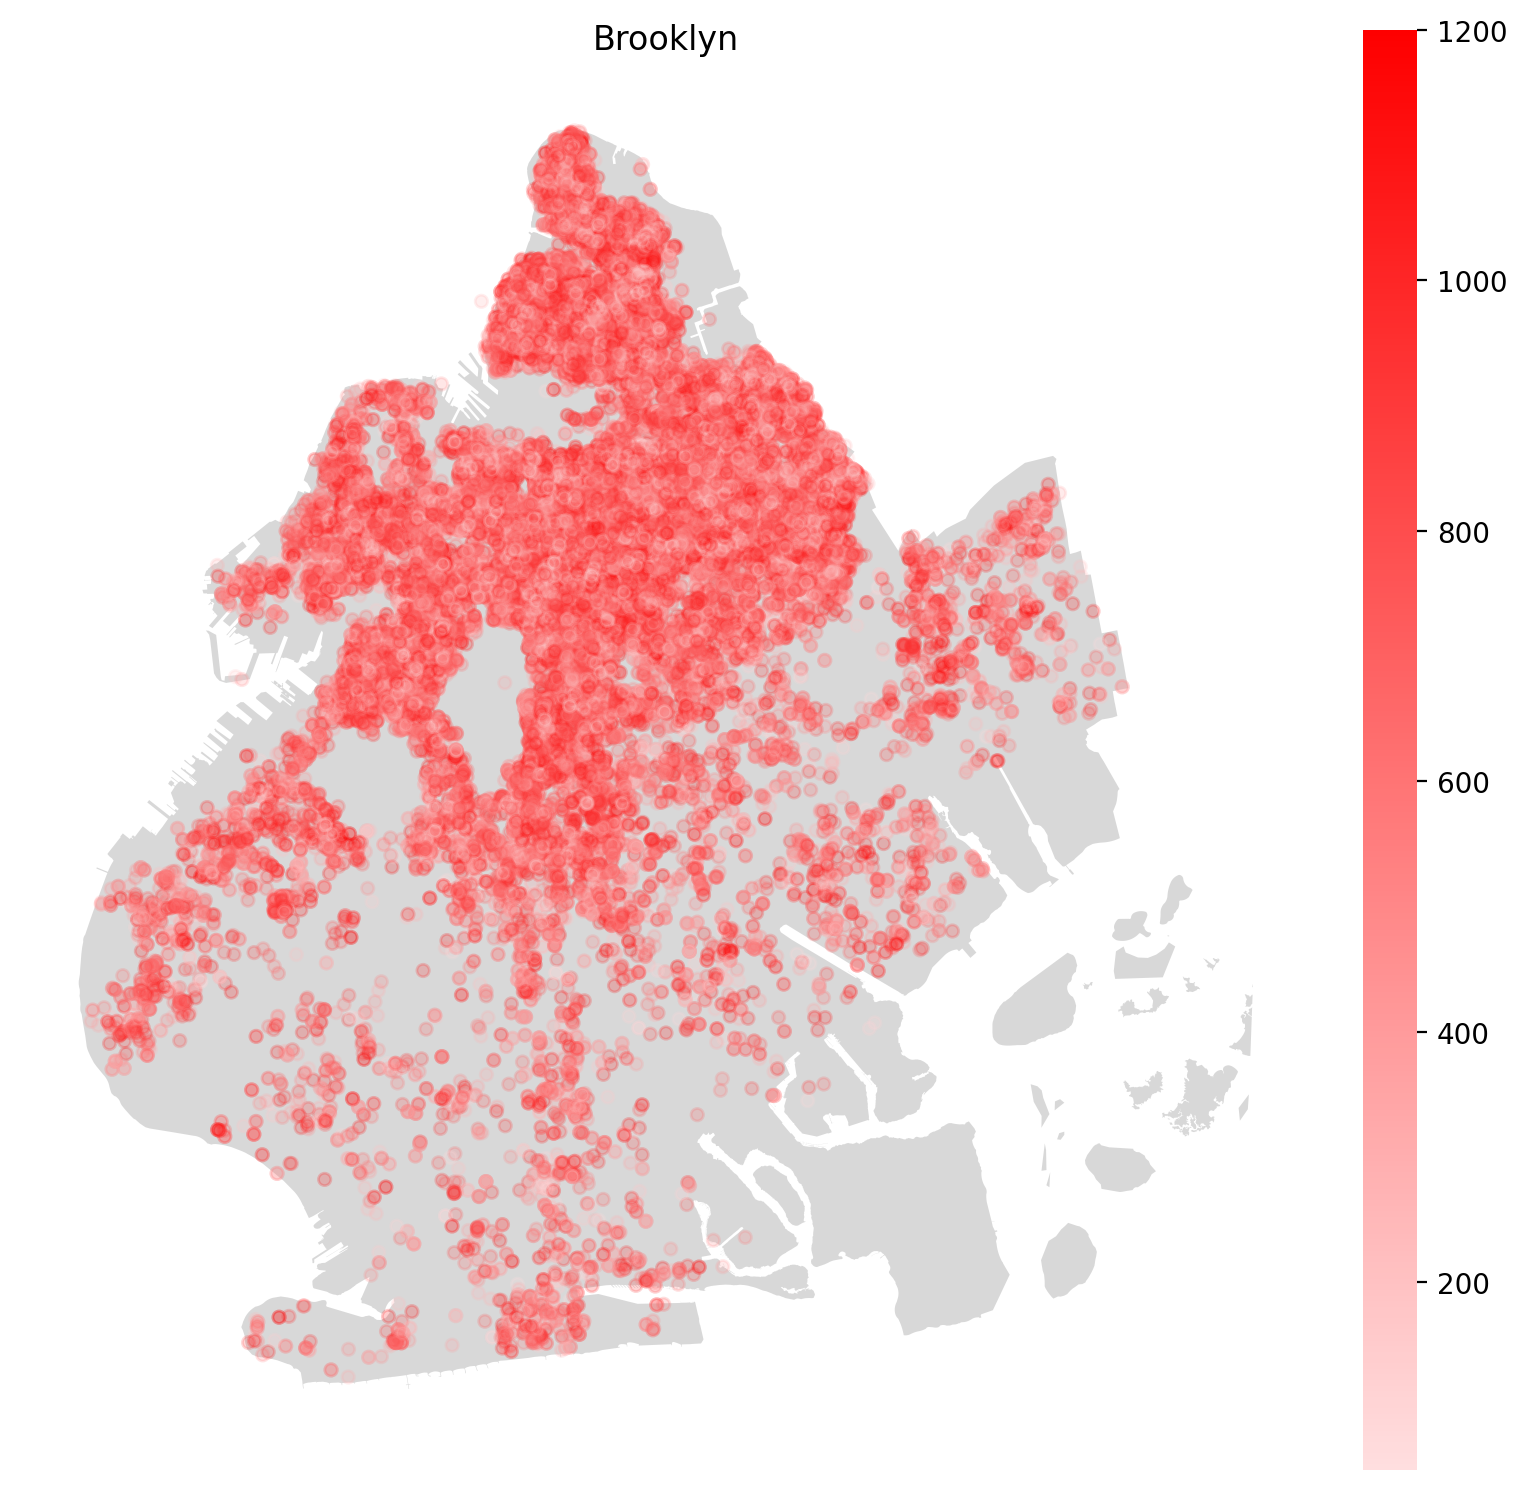

In [21]:
fig, ax = plt.subplots(figsize=(9,9))

# brooklyn.plot(ax=ax, facecolor='black',linewidth=1, alpha=0.9)

brooklyn.plot(ax=ax, facecolor='grey',linewidth=1, alpha=0.3)

check = brooklyn_geo.plot(ax=ax, markersize=20, alpha=0.2, c=df['price'], cmap=cmap, legend=True)

fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=50, vmax=1200))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.outline.set_visible(False)

#hide the frames, only show x and y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Brooklyn")

plt.show()

In [22]:
staten = nyc.iloc[[0], :]
staten_geo = geodata[geodata['boroname'] == 'Staten Island']

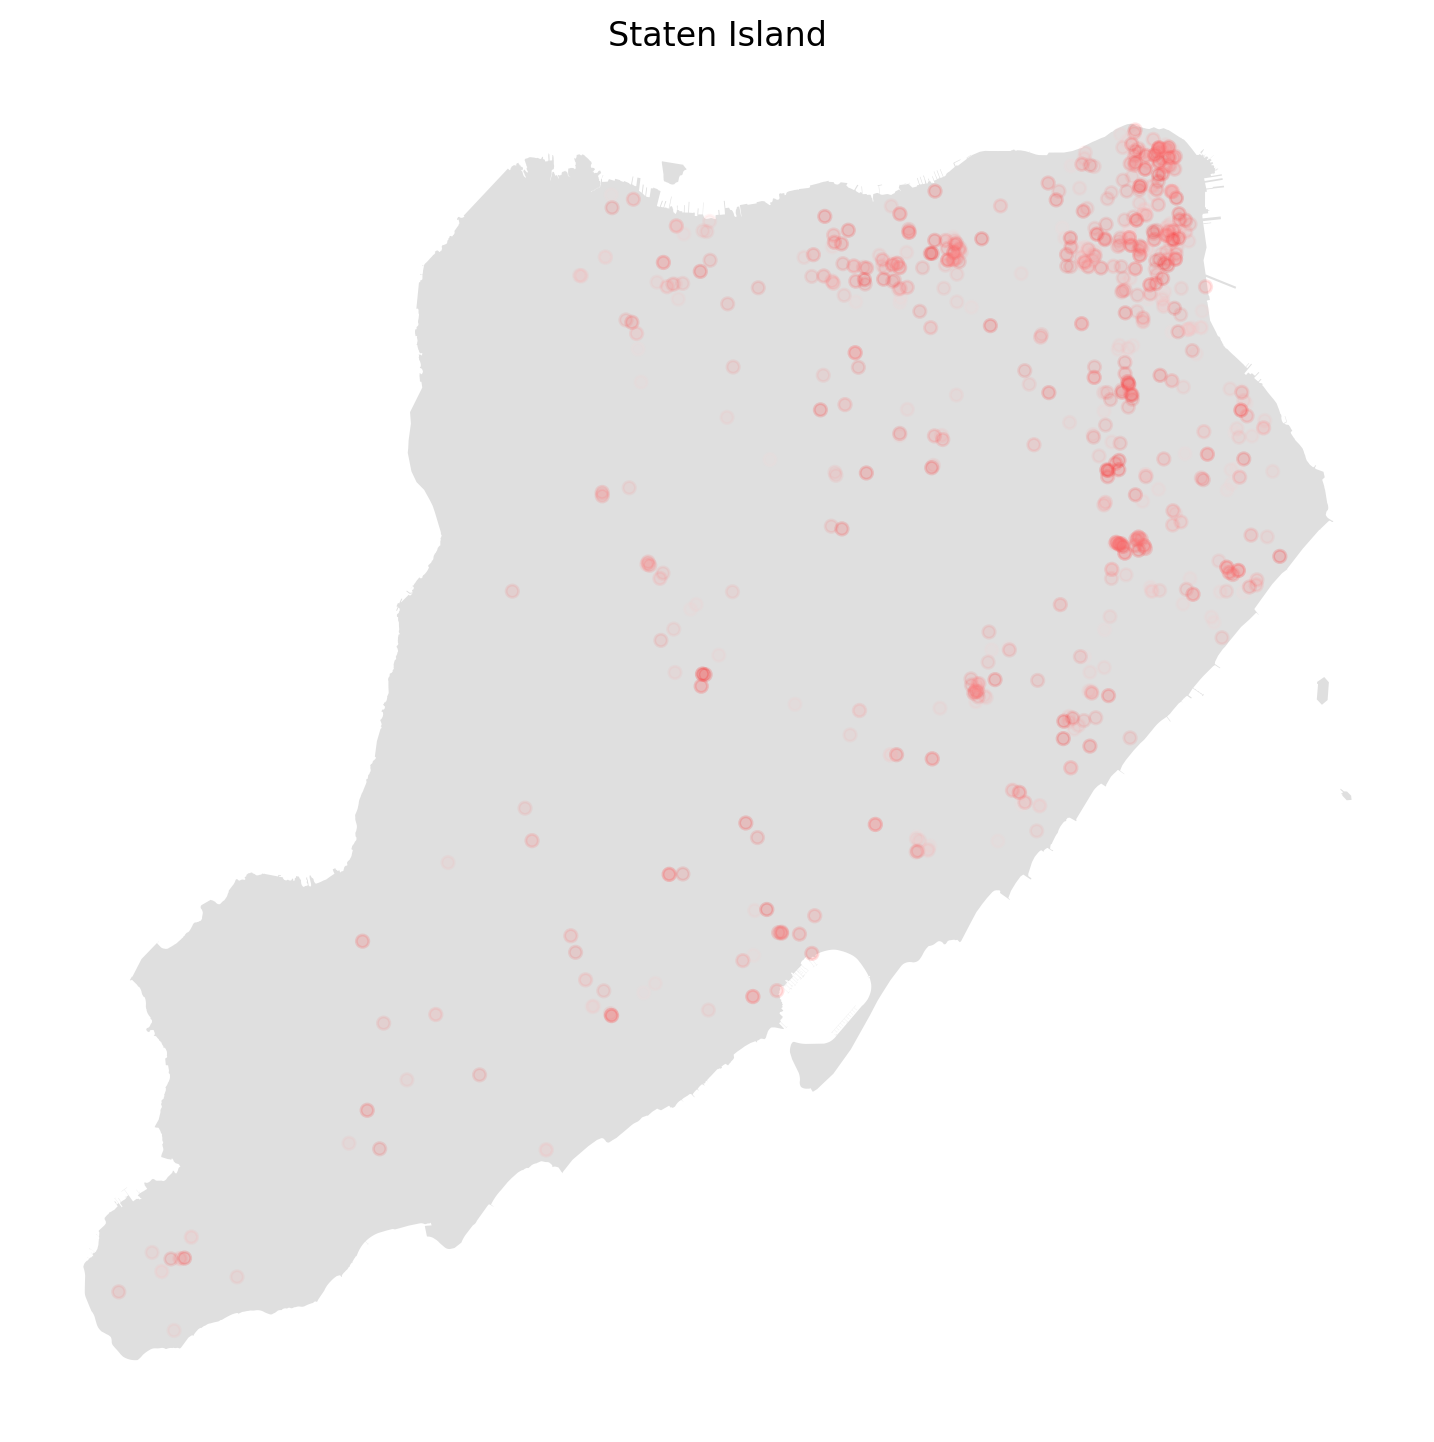

In [23]:
fig, ax = plt.subplots(figsize=(9,9))

# brooklyn.plot(ax=ax, facecolor='black',linewidth=1, alpha=0.9)

staten.plot(ax=ax, facecolor='grey',linewidth=1, alpha=0.25)

staten_geo.plot(ax=ax, markersize=20, alpha=0.1, c=df['price'], cmap=cmap, legend=True)

# cbar = plt.colorbar(ax.get_children()[0], ax=ax, pad=0.04, label='Age')

#hide the frames, only show x and y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Staten Island")
# ax.legend()

plt.show()

In [24]:
queens = nyc.iloc[[1], :]
queens_geo = geodata[geodata['boroname'] == 'Queens']

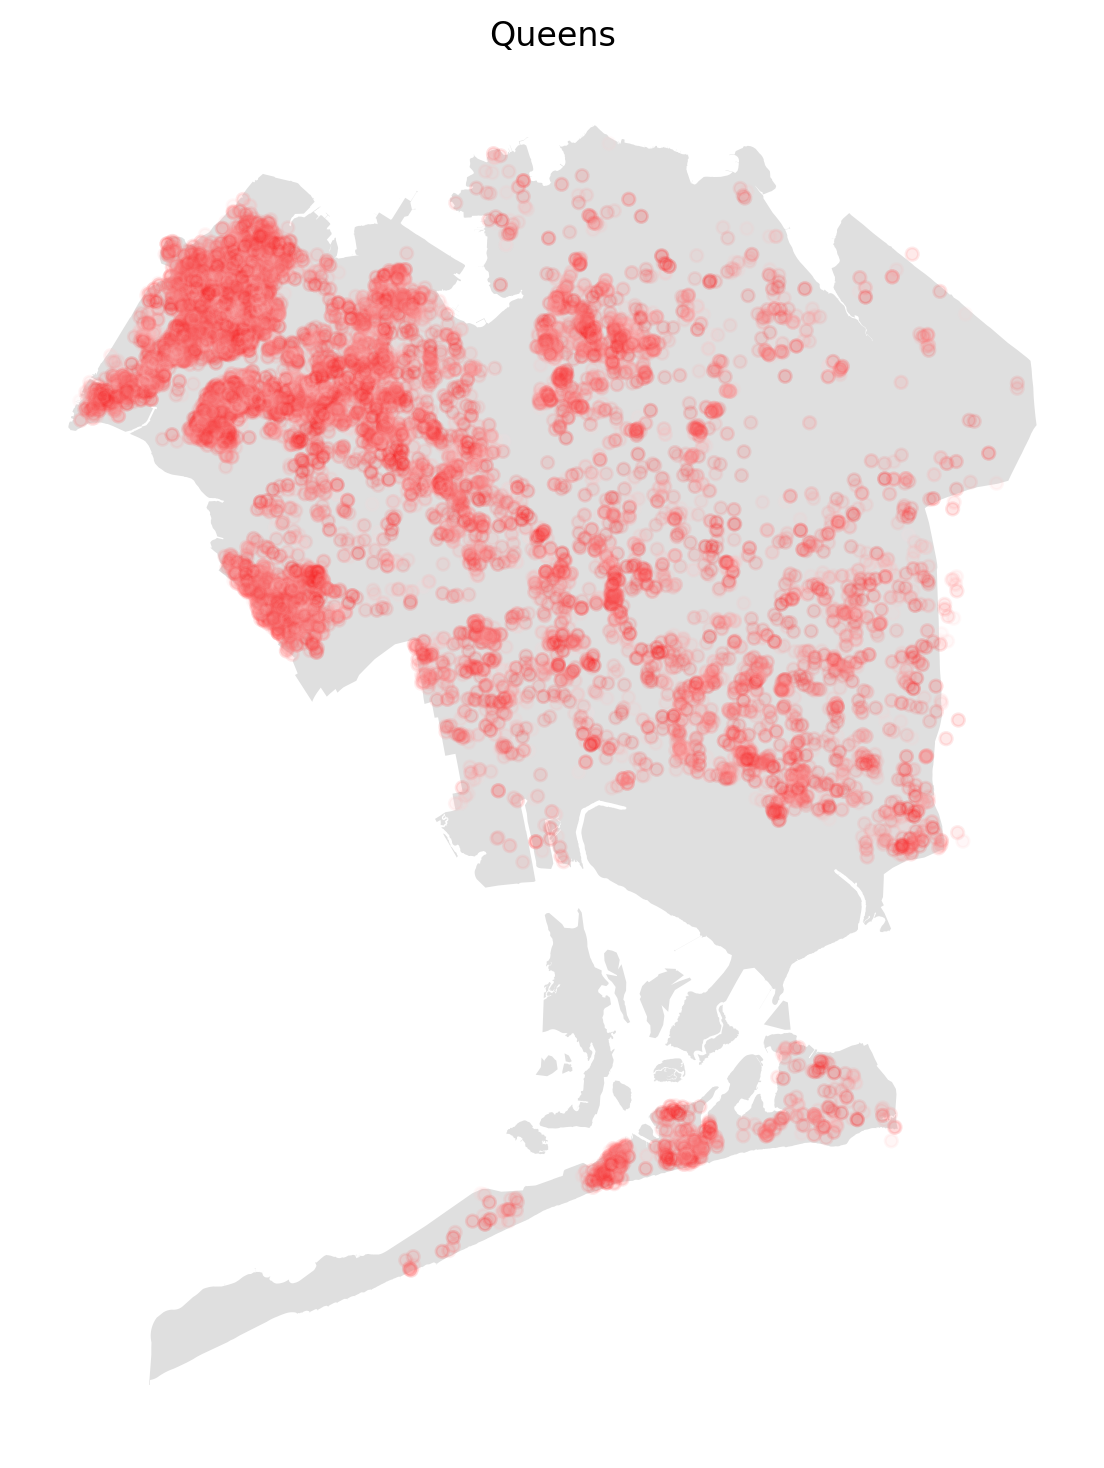

In [25]:
fig, ax = plt.subplots(figsize=(9,9))

# brooklyn.plot(ax=ax, facecolor='black',linewidth=1, alpha=0.9)
queens.plot(ax=ax, facecolor='grey',linewidth=1, alpha=0.25)

queens_geo.plot(ax=ax, markersize=20, alpha=0.1, c=df['price'], cmap=cmap, legend=True)

# cbar = plt.colorbar(ax.get_children()[0], ax=ax, pad=0.04, label='Age')

#hide the frames, only show x and y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Queens")
# ax.legend()

plt.show()

In [26]:
manhattan = nyc.iloc[[3], :]
manhattan_geo = geodata[geodata['boroname'] == 'Manhattan']

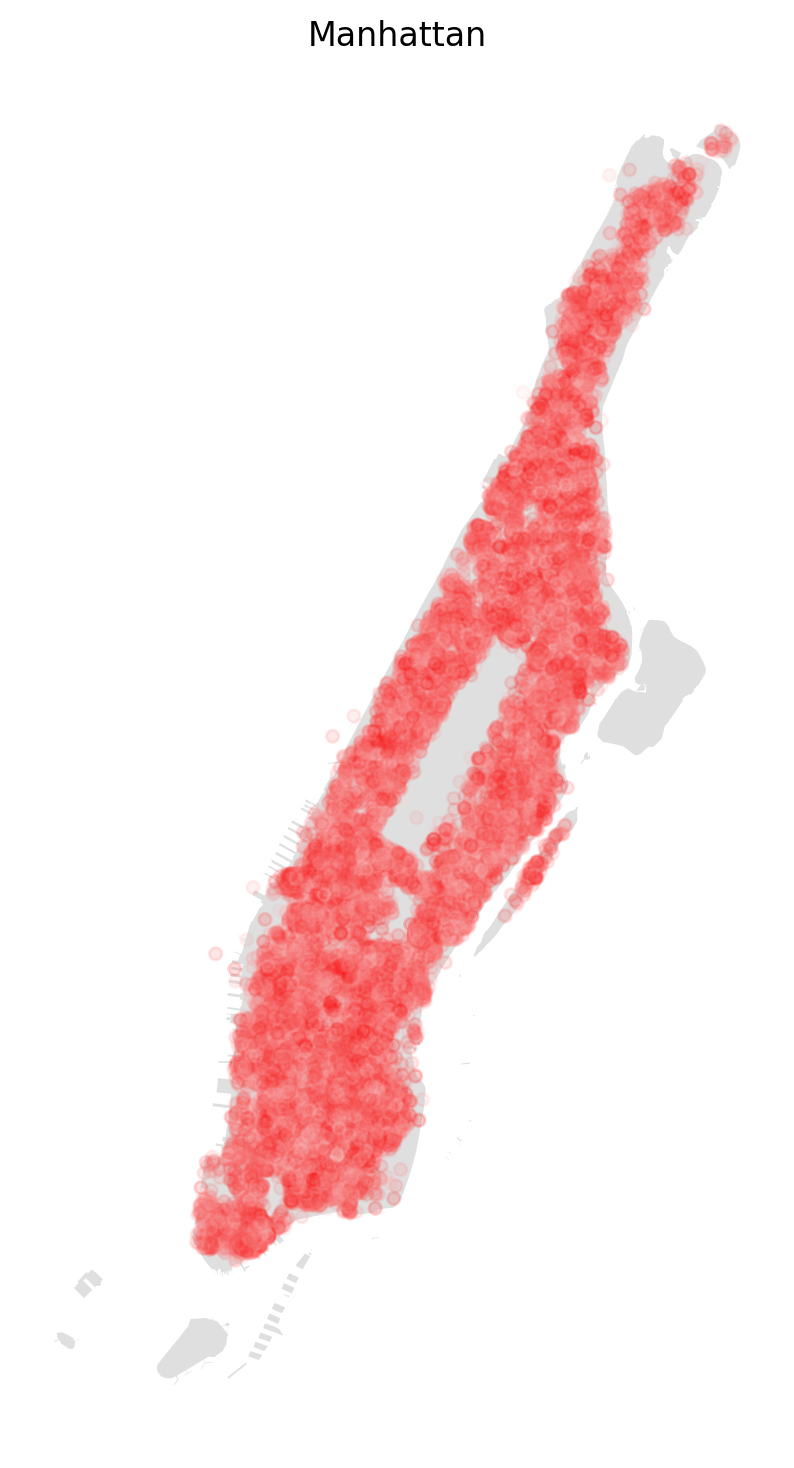

In [27]:
fig, ax = plt.subplots(figsize=(9,9))

# brooklyn.plot(ax=ax, facecolor='black',linewidth=1, alpha=0.9)
manhattan.plot(ax=ax, facecolor='grey',linewidth=1, alpha=0.25)

manhattan_geo.plot(ax=ax, markersize=20, alpha=0.1, c=df['price'], cmap=cmap, legend=True)

# cbar = plt.colorbar(ax.get_children()[0], ax=ax, pad=0.04, label='Age')

#hide the frames, only show x and y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Manhattan")
# ax.legend()

plt.show()

In [28]:
bronx = nyc.iloc[[4], :]
bronx_geo = geodata[geodata['boroname'] == 'Bronx']

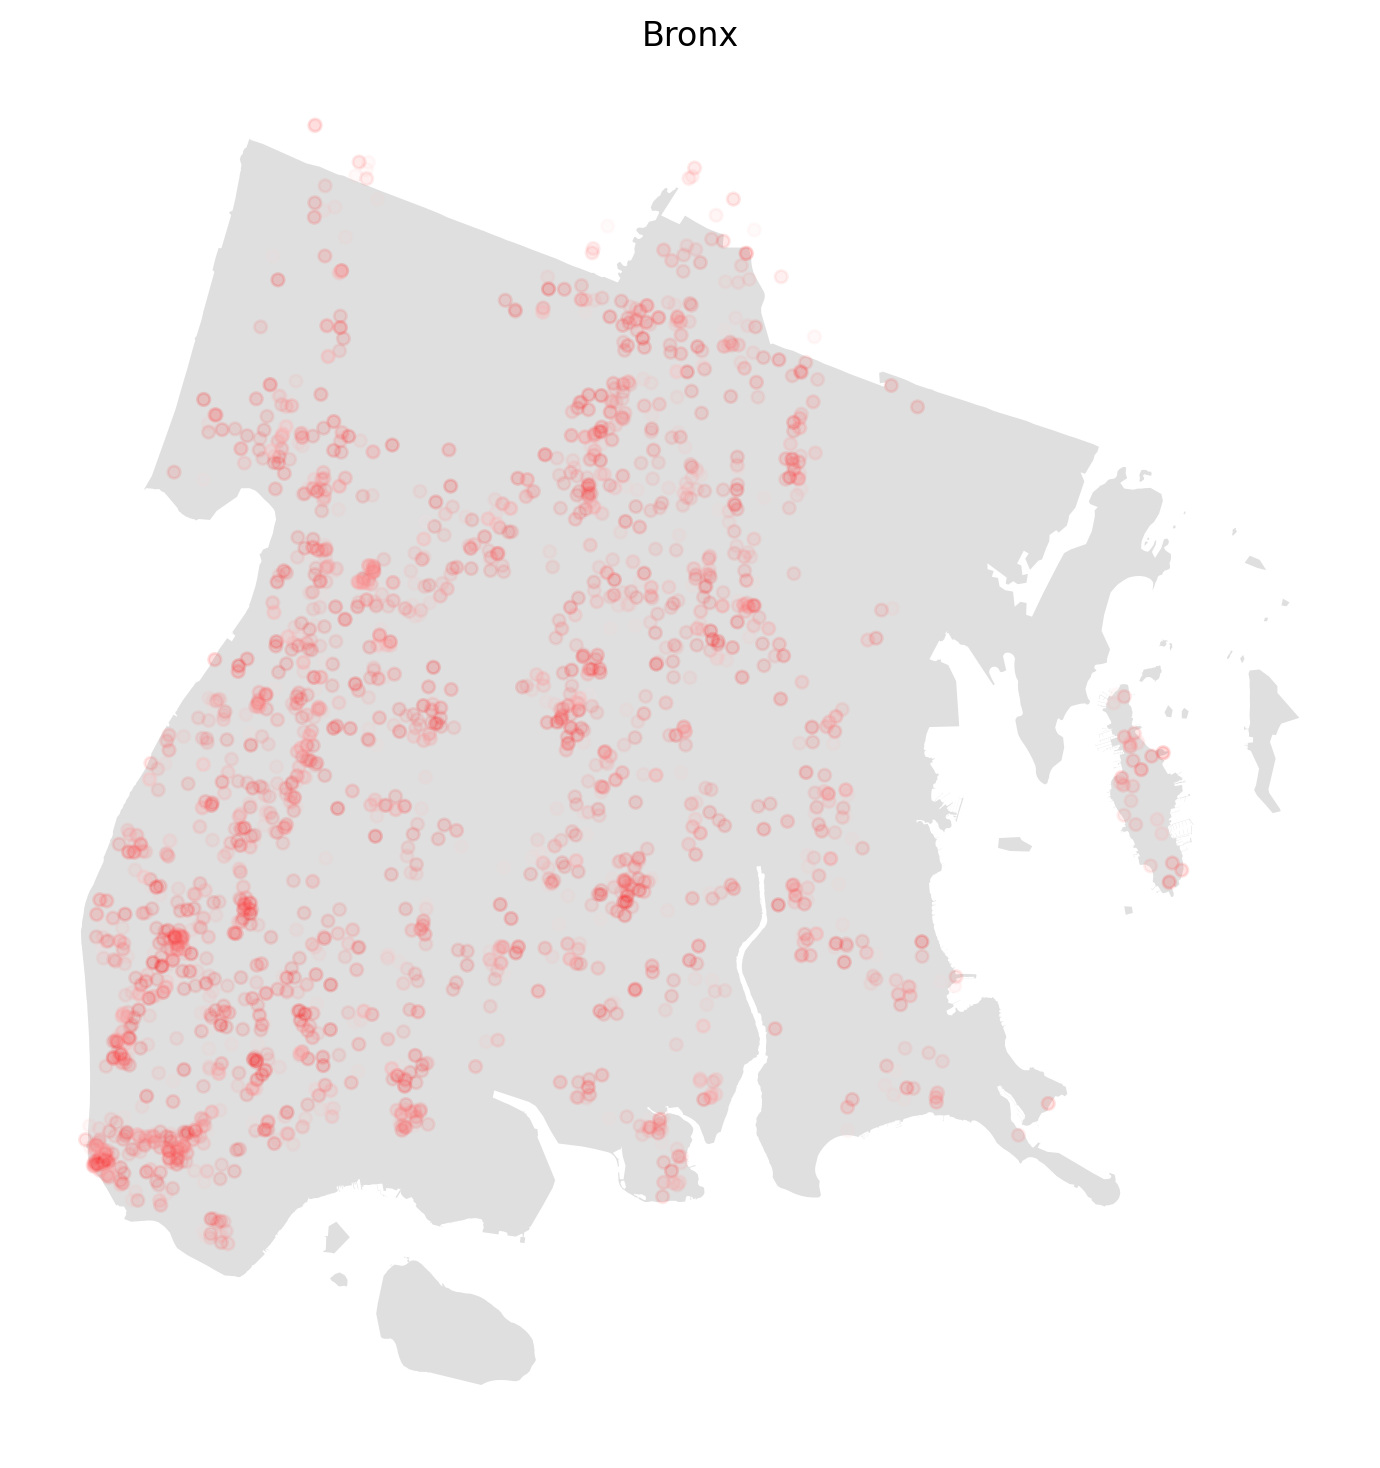

In [29]:
fig, ax = plt.subplots(figsize=(9,9))

bronx.plot(ax=ax, facecolor='grey',linewidth=1, alpha=0.25)

bronx_geo.plot(ax=ax, markersize=20, alpha=0.1, c=df['price'], cmap=cmap, legend=True)

# cbar = plt.colorbar(ax.get_children()[0], ax=ax, pad=0.04, label='Age')

#hide the frames, only show x and y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Bronx")
# ax.legend()

plt.show()

# Sunburst Chart

In [30]:
sun = df[['room type','instant_bookable','cancellation_policy']]
sun.head()

room type  instant_bookable cancellation_policy
0     Private room               0.0              strict
1  Entire home/apt               0.0            moderate
2     Private room               1.0            flexible
3  Entire home/apt               1.0            moderate
4  Entire home/apt               0.0            moderate

In [31]:
sun['room type'].value_counts()

room type
Entire home/apt    52925
Private room       45992
Shared room         2191
Hotel room           113
Name: count, dtype: int64

In [32]:
rt = pd.DataFrame(sun['room type'].value_counts()).reset_index()
total = rt['count'].sum()
rt['perc'] = ((rt['count']/total)*100)
rt['log'] = np.log(rt['count'])
rt

room type  count       perc        log
0  Entire home/apt  52925  52.286581  10.876631
1     Private room  45992  45.437212  10.736223
2      Shared room   2191   2.164571   7.692113
3       Hotel room    113   0.111637   4.727388

In [33]:
eh = pd.DataFrame(sun[sun['room type'] == 'Entire home/apt']['instant_bookable'].value_counts()).reset_index()
total = eh['count'].sum()
eh['perc'] = (eh['count']/total)*100
eh

instant_bookable  count       perc
0               0.0  26529  50.181591
1               1.0  26337  49.818409

In [34]:
pr = pd.DataFrame(sun[sun['room type'] == 'Private room']['instant_bookable'].value_counts()).reset_index()
total = pr['count'].sum()
pr['perc'] = (pr['count']/total)*100
pr

instant_bookable  count       perc
0               0.0  23119  50.304626
1               1.0  22839  49.695374

In [35]:
sr = pd.DataFrame(sun[sun['room type'] == 'Shared room']['instant_bookable'].value_counts()).reset_index()
total = sr['count'].sum()
sr['perc'] = (sr['count']/total)*100
sr

instant_bookable  count       perc
0               1.0   1126  51.462523
1               0.0   1062  48.537477

In [36]:
hr = pd.DataFrame(sun[sun['room type'] == 'Hotel room']['instant_bookable'].value_counts()).reset_index()
total = hr['count'].sum()
hr['perc'] = (hr['count']/total)*100
hr

instant_bookable  count       perc
0               1.0     61  53.982301
1               0.0     52  46.017699

In [37]:
import plotly.graph_objects as go

color_discrete_sequence = ['', '#FF5A5F', '#00A699','#FC642D','#767676']

fig =go.Figure(go.Sunburst(
    ids=[
    "Eve", "Private Room", "Shared Room", "Entire Home", "Hotel Room", "Private Room - Instant", "Shared Room - Instant",
    "Entire Home - Instant", "Hotel Room - Instant","Private Room - Not Instant", "Shared Room - Not Instant",
    "Entire Home - Not Instant", "Hotel Room - Not Instant"],
    labels=[ "Instant Bookable", "Shared<br>Room", "Private<br>Room", "Entire<br>Home", "Hotel<br>Room", 
            "Not<br>Instant", "Instant", "Instant", "Not<br>Instant","Instant", "Not<br>Instant","Instant", "Not<br>Instant"],
    parents=["",    "Eve",  "Eve",  "Eve", "Eve", 
             "Shared Room", "Shared Room","Entire Home", "Entire Home",
            "Private Room", "Private Room", "Hotel Room","Hotel Room"],
    # values=[ 35,    8,     11,     11,     5,      4.1,      3.9,      5.4,    5.6,    5.3,    5.7,    2.1,    2.9],
    values=[ 35,    8,     11,     11,     5,     5.6,   5.4,  4.9+0.5,  5.1+0.5,  4.8-1,  5.2-1,  5.4-2.5,  4.6-2.5],
    branchvalues="total", marker=dict(colors=color_discrete_sequence)
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0), width=600, height=500)

fig.show()

In [38]:
pr = pd.DataFrame(sun[sun['room type'] == 'Private room']['cancellation_policy'].value_counts()).reset_index()
total = pr['count'].sum()
pr['perc'] = (pr['count']/total)*100
pr

cancellation_policy  count       perc
0            moderate  15481  33.677043
1              strict  15313  33.311580
2            flexible  15175  33.011377

In [39]:
eh = pd.DataFrame(sun[sun['room type'] == 'Entire home/apt']['cancellation_policy'].value_counts()).reset_index()
total = eh['count'].sum()
eh['perc'] = (eh['count']/total)*100
eh

cancellation_policy  count       perc
0            flexible  17662  33.402678
1            moderate  17649  33.378092
2              strict  17565  33.219230

In [40]:
sr = pd.DataFrame(sun[sun['room type'] == 'Shared room']['cancellation_policy'].value_counts()).reset_index()
total = sr['count'].sum()
sr['perc'] = (sr['count']/total)*100
sr

cancellation_policy  count       perc
0              strict    733  33.500914
1            flexible    730  33.363803
2            moderate    725  33.135283

In [41]:
hr = pd.DataFrame(sun[sun['room type'] == 'Hotel room']['cancellation_policy'].value_counts()).reset_index()
total = hr['count'].sum()
hr['perc'] = (hr['count']/total)*5
hr

cancellation_policy  count      perc
0            flexible     42  1.858407
1            moderate     37  1.637168
2              strict     34  1.504425

In [42]:
color_discrete_sequence = ['', '#FF5A5F', '#00A699','#FC642D','#767676']

fig =go.Figure(go.Sunburst(
    ids=[
    "Eve", "Private Room", "Shared Room", "Entire Home", "Hotel Room", "Private Room - Moderate", "Shared Room - Moderate",
    "Entire Home - Moderate", "Hotel Room - Moderate","Private Room - Flexible", "Shared Room - Flexible",
    "Entire Home - Flexible", "Hotel Room - Flexible","Private Room - Strict", "Shared Room - Strict",
    "Entire Home - Strict", "Hotel Room - Strict"],
    labels=[ "Cancellation Policy", "Shared<br>Room", "Private<br>Room", "Entire<br>Home", "Hotel<br>Room", 
            "Moderate", "Flexible", "Strict", "Moderate", "Flexible", "Strict", 
            "Moderate", "Flexible", "Strict", "Moderate", "Flexible", "Strict"],
    parents=["",    "Eve",  "Eve",  "Eve", "Eve", 
             "Shared Room", "Shared Room", "Shared Room", "Entire Home", "Entire Home", "Entire Home",
            "Private Room", "Private Room", "Private Room", "Hotel Room","Hotel Room", "Hotel Room"],
    values=[35,    8,     11,     11,     5,  3.6, 3.6, 3.8   , 3.6, 3.6, 3.8   ,  2.6, 2.6, 2.8 , 1.6, 1.9, 1.5],
    branchvalues="total", marker=dict(colors=color_discrete_sequence)
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0) , width=600, height=500)

fig.show()